In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Ganti 'nama_file.csv' sesuai nama file kamu
# df = pd.read_csv('customer_segmentation_data.csv')
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
# Tampilkan 5 data teratas
df.head()

,Customer ID,Age,Gender,Annual_Income,Spending_Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
print("Ringkasan Dataset:")
print(df.head())
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

Ringkasan Dataset:
                            Customer ID  Age  Gender  Annual_Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending_Score  
0              89  
1              95  
2              76  
3              57  
4              76  

Statistik Deskriptif:
                Age  Annual_Income  Spending_Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max

In [4]:
# Pilih fitur yang akan digunakan untuk clustering
#features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
features = ['Age', 'Annual_Income', 'Spending_Score']
X = df[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Metode Elbow untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Hitung Silhouette Score untuk setiap k
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {k}, silhouette score adalah {silhouette_avg:.3f}")

C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Untuk n_clusters = 2, silhouette score adalah 0.244
Untuk n_clusters = 3, silhouette score adalah 0.240
Untuk n_clusters = 4, silhouette score adalah 0.264
Untuk n_clusters = 5, silhouette score adalah 0.267
Untuk n_clusters = 6, silhouette score adalah 0.290
Untuk n_clusters = 7, silhouette score adalah 0.282
Untuk n_clusters = 8, silhouette score adalah 0.280
Untuk n_clusters = 9, silhouette score adalah 0.289
Untuk n_clusters = 10, silhouette score adalah 0.276


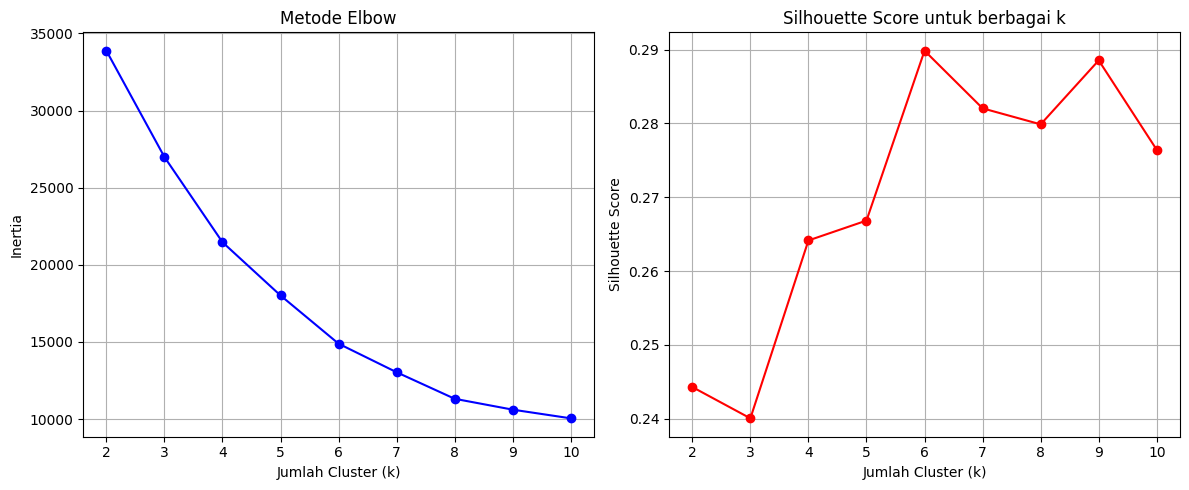

In [6]:
# Plot Metode Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk berbagai k')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
optimal_k = 6  # Sesuaikan berdasarkan hasil plot

# Terapkan K-means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_scaled)
df['cluster'] = kmeans_optimal.labels_

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans_optimal.labels_)
print(f"\nSilhouette Score untuk {optimal_k} cluster: {silhouette_avg:.3f}")

# Analisis hasil clustering
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
print("\nRata-rata setiap feature berdasarkan cluster:")
print(cluster_summary)


Silhouette Score untuk 6 cluster: 0.290

Rata-rata setiap feature berdasarkan cluster:
               Age  Annual_Income  Spending_Score
cluster                                          
0        74.516966   80705.298204       25.073453
1        45.882159  160990.600742       22.373300
2        34.052653  142626.288557       76.328358
3        60.300077   59829.590944       78.608596
4        74.360140  155183.733489       65.982906
5        34.619961   63619.758904       34.036791


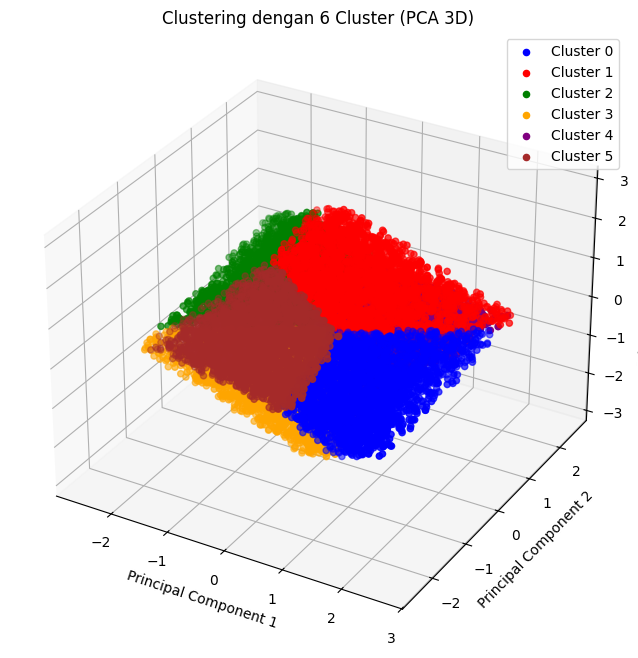

In [8]:
# Visualisasi hasil clustering (PCA untuk visualisasi multidimensional)
from sklearn.decomposition import PCA

# Reduksi dimensi ke 3D untuk visualisasi
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(optimal_k):
    ax.scatter(X_pca[kmeans_optimal.labels_ == i, 0], 
               X_pca[kmeans_optimal.labels_ == i, 1], 
               X_pca[kmeans_optimal.labels_ == i, 2], 
               c=colors[i], label=f'Cluster {i}')

ax.set_title(f'Clustering dengan {optimal_k} Cluster (PCA 3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()


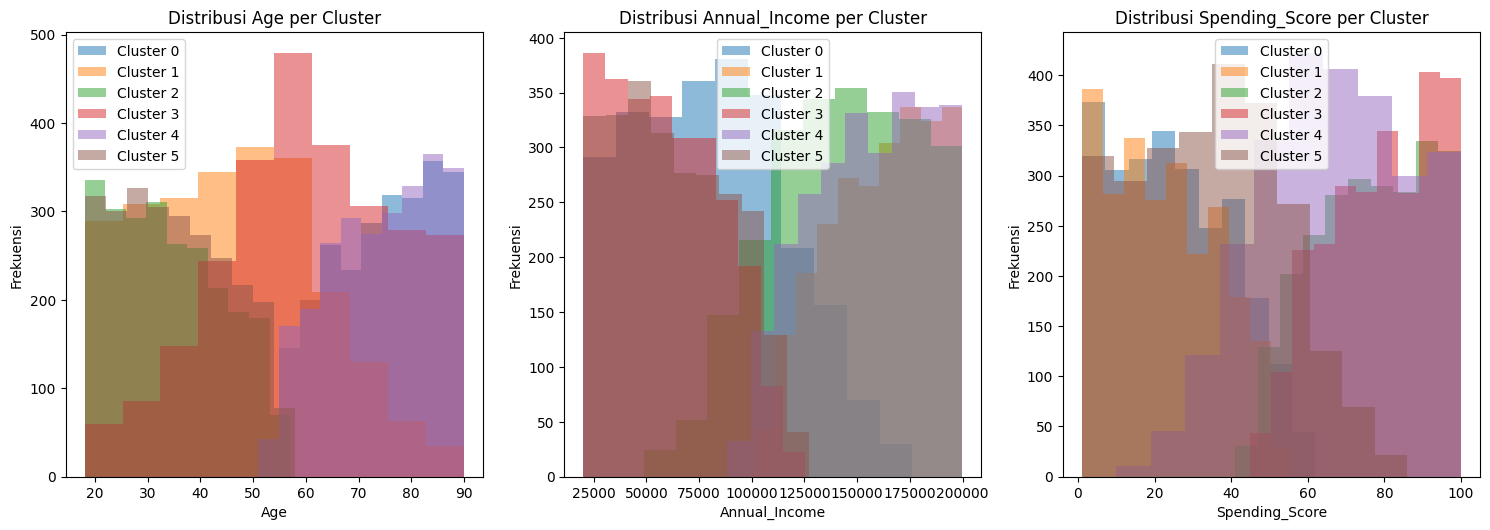

In [9]:
# Visualisasi karakteristik cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    for cluster in range(optimal_k):
        data = df[df['cluster'] == cluster][feature]
        plt.hist(data, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.legend()
plt.tight_layout()
plt.show()

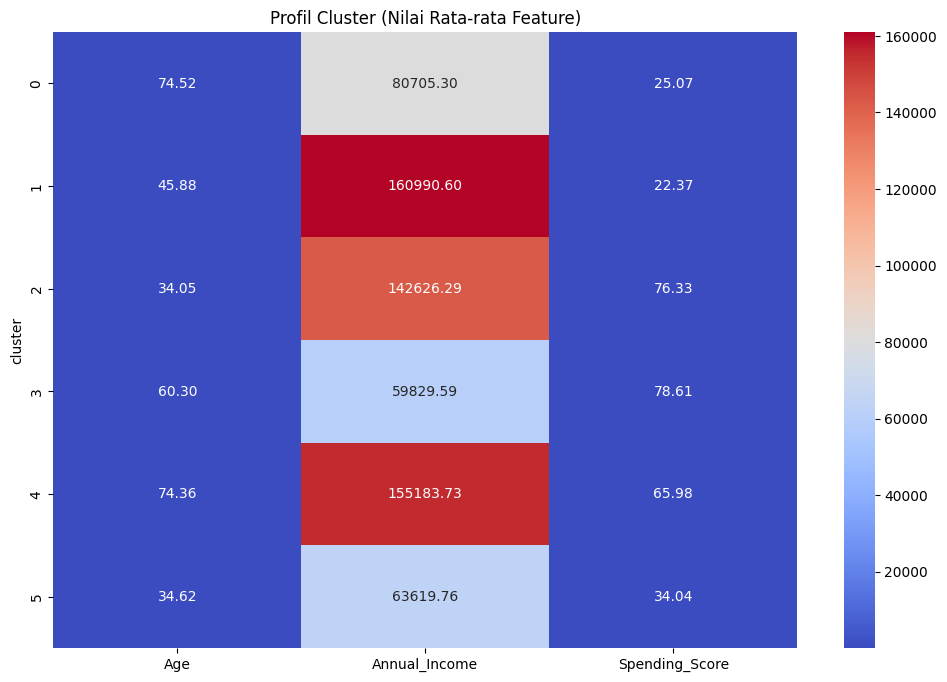

In [10]:
# Heatmap profil cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Profil Cluster (Nilai Rata-rata Feature)')
plt.show()

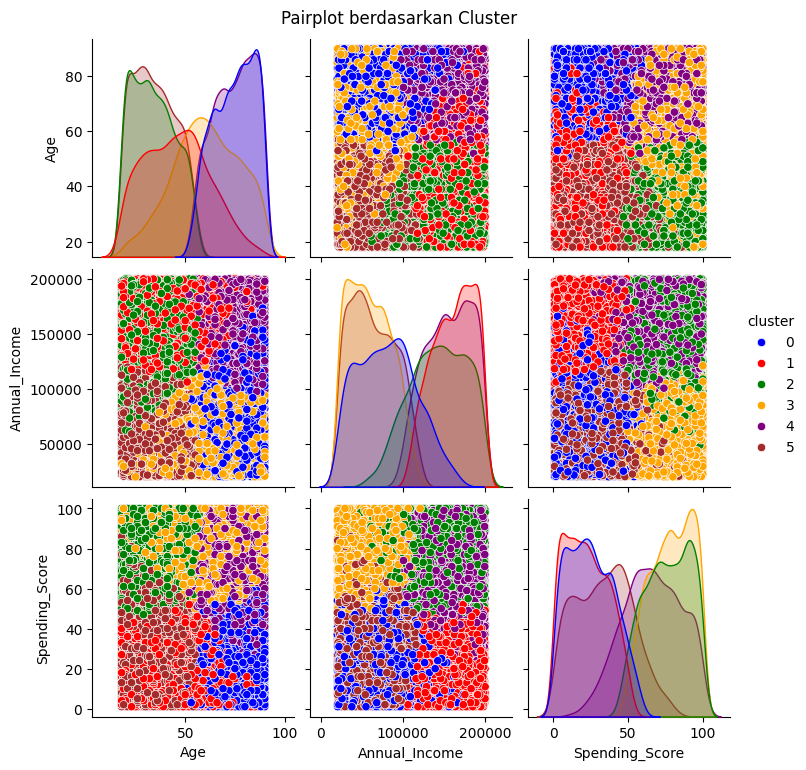

In [11]:
# Pairplot untuk insight antar feature
sns.pairplot(df, hue='cluster', vars=features[:3], palette=colors[:optimal_k])
plt.suptitle('Pairplot berdasarkan Cluster', y=1.02)
plt.show()

In [12]:
print("\nInterpretasi Cluster:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    for feature in features:
        mean_val = cluster_summary.loc[i, feature]
        print(f"- Rata-rata {feature}: {mean_val:.2f}")


Interpretasi Cluster:

Cluster 0:
- Rata-rata Age: 74.52
- Rata-rata Annual_Income: 80705.30
- Rata-rata Spending_Score: 25.07

Cluster 1:
- Rata-rata Age: 45.88
- Rata-rata Annual_Income: 160990.60
- Rata-rata Spending_Score: 22.37

Cluster 2:
- Rata-rata Age: 34.05
- Rata-rata Annual_Income: 142626.29
- Rata-rata Spending_Score: 76.33

Cluster 3:
- Rata-rata Age: 60.30
- Rata-rata Annual_Income: 59829.59
- Rata-rata Spending_Score: 78.61

Cluster 4:
- Rata-rata Age: 74.36
- Rata-rata Annual_Income: 155183.73
- Rata-rata Spending_Score: 65.98

Cluster 5:
- Rata-rata Age: 34.62
- Rata-rata Annual_Income: 63619.76
- Rata-rata Spending_Score: 34.04


In [13]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, df['cluster'])
print(f"\nSilhouette Score untuk k = {optimal_k}: {sil_score:.4f}")

NameError: name 'data_scaled' is not defined